<a href="https://colab.research.google.com/github/Dhanush-Karthik16/Lungcancer_prediction_using_Random_Forest/blob/main/Lungcancer_prediction_using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
data=pd.read_csv('/content/survey lung cancer.csv')
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
data.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


<Axes: ylabel='AGE'>

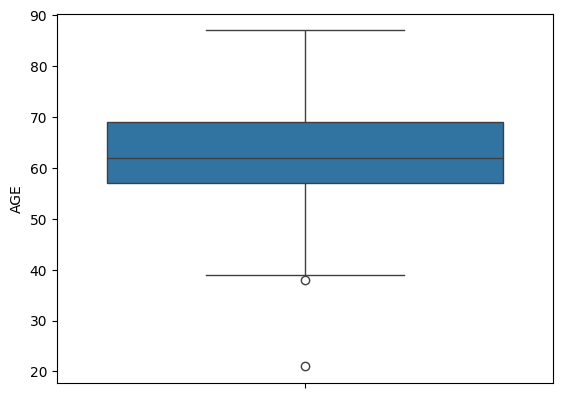

In [4]:
sns.boxplot(data['AGE'])

In [5]:
from scipy.stats import zscore
z_score=zscore(data['AGE'])
data[np.abs(z_score)>3]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
22,F,21,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
238,F,38,1,2,1,1,2,2,2,2,1,2,2,1,2,YES


<Axes: ylabel='AGE'>

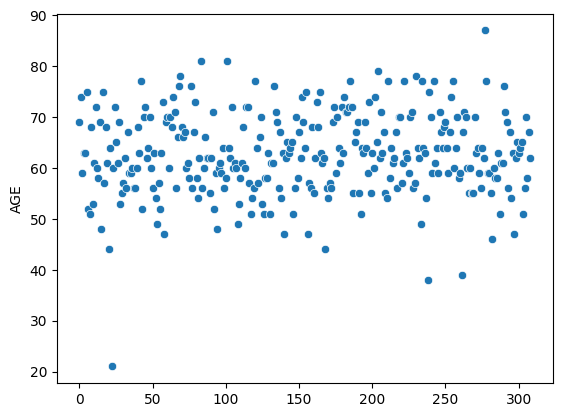

In [6]:
sns.scatterplot(data['AGE'])

In [7]:
data['AGE']=np.where(data['AGE']<40,data['AGE'].median(),data['AGE'])
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56.0,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70.0,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58.0,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67.0,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER'])
data['GENDER']=le.fit_transform(data['GENDER'])
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59.0,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63.0,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63.0,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56.0,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70.0,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58.0,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67.0,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [9]:
x=data.drop('LUNG_CANCER',axis=1)
y=data['LUNG_CANCER']

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,n_jobs=-1)
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [15]:
ypred=rf.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytest,ypred)

0.9032258064516129

In [16]:
confusion_matrix(ytest,ypred)

array([[ 6,  4],
       [ 2, 50]])